In [1]:
from PIL import Image
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

In [2]:
black_mask_path = r"D:/deepfakes/mask_xray/black_mask.png"

In [3]:
x_ray_real = Image.open(black_mask_path)

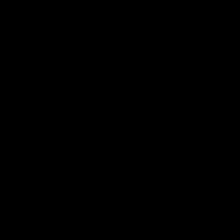

In [4]:
x_ray_real

In [5]:
path_fake_image_example = r"D:\deepfakes\training_fake_faces\owxbbpjpch\owxbbpjpch_0.png"

In [65]:
fake_image_example = Image.open(path_fake_image_example)

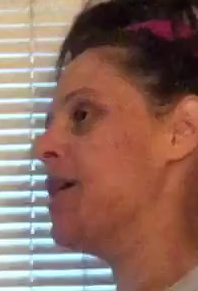

In [66]:
fake_image_example

In [67]:
fake_image_example = np.asarray(fake_image_example)

In [9]:
import face_alignment

In [10]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False)

In [11]:
preds = fa.get_landmarks(fake_image_example)

In [12]:
points = preds[0]

In [49]:
hull = ConvexHull(points)

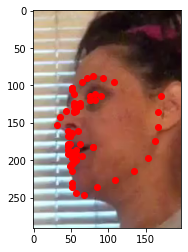

In [49]:
import matplotlib.pyplot as plt
im = plt.imread(path_fake_image_example)
implot = plt.imshow(im)

# # put a red dot, size 40, at 2 locations:
plt.scatter(x=x, y=y, c='r')

plt.show()

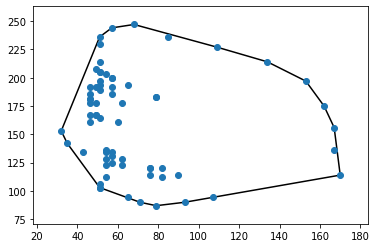

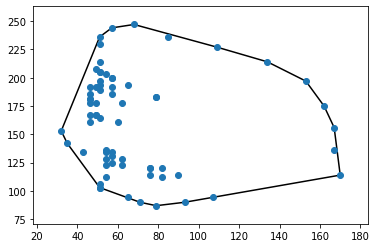

In [35]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
hull = ConvexHull(points)
convex_hull_plot_2d(hull)

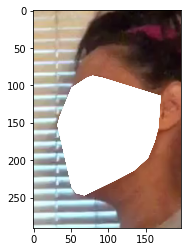

In [36]:
import matplotlib.pyplot as plt
im = plt.imread(path_fake_image_example)
implot = plt.imshow(im)
for simplex in hull.simplices:
    plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'w')

# plt.imsave(r"D:/deepfakes/x_ray_example_on_one_picture/convex_hull_white.png")

In [68]:
img = cv2.drawContours(fake_image_example, [points[hull.vertices].astype(int)], -1, (255,255,255), thickness=cv2.FILLED)

In [71]:
cv2.imwrite(r"D:/deepfakes/x_ray_example_on_one_picture/convex_hull.png",cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

True

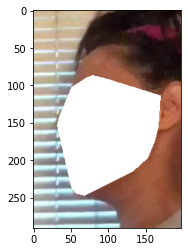

In [69]:
plt.imshow(img)

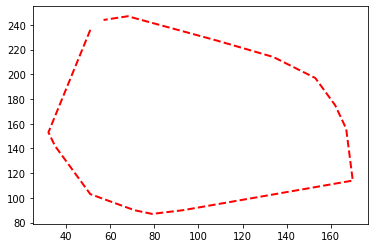

In [38]:
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plt.show()

In [101]:
im.shape

(224, 224, 3)

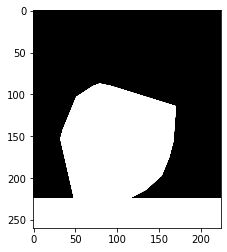

In [100]:
import matplotlib.pyplot as plt
im = plt.imread(black_mask_path)
implot = plt.imshow(im)
for simplex in hull.simplices:
    plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'w')

In [14]:
import cv2

In [15]:
black_frame = np.asarray(x_ray_real)

In [16]:
cv2_hull = cv2.convexHull(points).astype(int)

In [17]:
cv2_hull

array([[[170, 114]],

       [[167, 156]],

       [[162, 175]],

       [[153, 197]],

       [[134, 214]],

       [[109, 227]],

       [[ 68, 247]],

       [[ 57, 244]],

       [[ 51, 236]],

       [[ 32, 153]],

       [[ 35, 142]],

       [[ 51, 103]],

       [[ 71,  90]],

       [[ 79,  87]],

       [[ 93,  90]]])

In [31]:
for i in range(len(cv2_hull)):
    color = 111
    img = cv2.drawContours(fake_image_example, cv2_hull, i, color)

In [32]:
PIL_image = Image.fromarray(np.uint8(img)).convert('RGB')

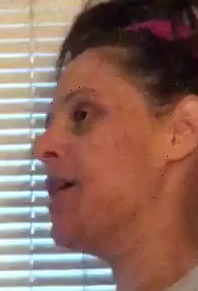

In [33]:
PIL_image

In [ ]:
# import matplotlib.pyplot as plt
# im = plt.imread(path_fake_image_example)
# implot = plt.imshow(im)
for simplex in hull.simplices:
    cv2.fillPoly( im, a3, 255 ).fill(points[hull.vertices,0], points[hull.vertices,1], 'w')